Copy of other ML notebook with new dataset

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import scipy.stats
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.neighbors
import unittest

Things I've tried to improve model: 

1. drop bit scores over 1000
2. Switch to 85/15 train/test split


In [2]:
import sys
sys.path

['/Users/loganroberts/Learn2Therm/ValidProt/notebooks',
 '/Library/Frameworks/Python.framework/Versions/3.9/lib/python39.zip',
 '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9',
 '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload',
 '',
 '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/extensions',
 '/Users/loganroberts/.ipython']

In [3]:
cd /Users/loganroberts/Learn2Therm/ValidProt/data

/Users/loganroberts/Learn2Therm/ValidProt/data


In [4]:
#import zipfile module
from zipfile import ZipFile

with ZipFile('learn2therm_sample_50k.zip', 'r') as f:

#extract in current directory
    f.extractall('learn2therm_sample_50k')

In [5]:
#convert to pandas df
df = pd.read_csv('learn2therm_sample_50k/learn2therm_sample_50k.csv')

In [6]:
df.head()

Unnamed: 0  local_gap_compressed_percent_id  scaled_local_query_percent_id  \
0           0                         0.287582                       0.217822   
1           1                         0.319635                       0.295359   
2           2                         0.279621                       0.234127   
3           3                         0.327273                       0.200743   
4           4                         0.338710                       0.318182   

   scaled_local_symmetric_percent_id  query_align_len  query_align_cov  \
0                           0.215686              160         0.792079   
1                           0.297872              218         0.919831   
2                           0.218924              211         0.837302   
3                           0.214712              166         0.617100   
4                           0.287671               60         0.909091   

   subject_align_len  subject_align_cov  bit_score  thermo_index  ...  \
0                152           0.737864        131           875  ...   
1                226           0.969957        282         11324  ...   
2                210           0.731707         96           875  ...   
3                163           0.696581        175           875  ...   
4                 71           0.887500         61          9827  ...   

   bit_score_16s  m_ogt  t_ogt  ogt_difference  \
0         1153.0   27.5   50.0            22.5   
1         1014.0   25.0   54.0            29.0   
2         1138.0   28.0   50.0            22.0   
3         1077.0   28.0   50.0            22.0   
4          991.0   30.0   50.0            20.0   

                                       m_protein_seq  \
0  MAESGTSRRADHLVPVPGPDAEPPAVADELLRAVGRGDEQAFGRLY...   
1  MARIALVDDDRNILTSVSMTLEAEGFEVETYNDGQSALDAFNKRMP...   
2  MKDTVVFVTGAARGIGAHTARLAVARGARVALVGLEPHLLADLAAE...   
3  MTSGLWERVLDGVWVTIQLLVLSALLATAVSFVVGIARTHRLWIVR...   
4  MIISLRRGLRFIRFIVFFAALVYLFYHVLDLFNGWISPVDQYQMPT...   

                                       t_protein_seq  \
0  MPSQITESERIELAERFERDALPLLDQLYSAALRMTRNPADAEDLV...   
1  MRVLLVEDDPNTSRSIEMMLTHANLNVYATDMGEEGIDLAKLYDYD...   
2  MTPEQIFSGQTAIVTGGASGIGAATVEHIARRGGRVFSVDLSYDSP...   
3  MAMSRRKRGQLARGIQYAILVIVVVVLALLADWGKIGKAFFDWEAA...   
4  MKRMVWRTLKVFIIFIACTLLFYFGLRFMHLEYEQFHRYEPPEGPA...   

                                      m_protein_desc  \
0               ECF RNA polymerase sigma factor SigK   
1            response regulator transcription factor   
2                          SDR family oxidoreductase   
3  ectoine/hydroxyectoine ABC transporter permeas...   
4                                YqzK family protein   

                                t_protein_desc  m_protein_len  t_protein_len  
0  sigma-70 family RNA polymerase sigma factor            206            202  
1      response regulator transcription factor            233            237  
2                    SDR family oxidoreductase            287            252  
3          amino acid ABC transporter permease            234            269  
4                          YqzK family protein             80             66  

[5 rows x 30 columns]

In [7]:
#get rid of stuff that isn't quantitative

df = df.drop(columns = ['Unnamed: 0','thermo_index', 'm_protein_seq', 't_protein_seq',
                        'm_protein_desc', 't_protein_desc'])

In [8]:
df.head()

local_gap_compressed_percent_id  scaled_local_query_percent_id  \
0                         0.287582                       0.217822   
1                         0.319635                       0.295359   
2                         0.279621                       0.234127   
3                         0.327273                       0.200743   
4                         0.338710                       0.318182   

   scaled_local_symmetric_percent_id  query_align_len  query_align_cov  \
0                           0.215686              160         0.792079   
1                           0.297872              218         0.919831   
2                           0.218924              211         0.837302   
3                           0.214712              166         0.617100   
4                           0.287671               60         0.909091   

   subject_align_len  subject_align_cov  bit_score  meso_index  \
0                152           0.737864        131       12897   
1                226           0.969957        282       13026   
2                210           0.731707         96        8203   
3                163           0.696581        175        3340   
4                 71           0.887500         61       14020   

   prot_pair_index  ...  scaled_local_query_percent_id_16s  \
0         48641291  ...                           0.921620   
1         92992745  ...                           0.900068   
2        157628663  ...                           0.919007   
3        136708305  ...                           0.908556   
4        133672542  ...                           0.883142   

   scaled_local_symmetric_percent_id_16s  query_align_cov_16s  \
0                               0.926461             0.998040   
1                               0.902522             1.000000   
2                               0.923531             1.000000   
3                               0.909745             0.996734   
4                               0.887107             0.998084   

   subject_align_cov_16s  bit_score_16s  m_ogt  t_ogt  ogt_difference  \
0               0.998020         1153.0   27.5   50.0            22.5   
1               1.000000         1014.0   25.0   54.0            29.0   
2               1.000000         1138.0   28.0   50.0            22.0   
3               0.996726         1077.0   28.0   50.0            22.0   
4               0.998067          991.0   30.0   50.0            20.0   

   m_protein_len  t_protein_len  
0            206            202  
1            233            237  
2            287            252  
3            234            269  
4             80             66  

[5 rows x 24 columns]

from pairplot below, it looks like query_align_cov_16s and subject_align_cov_16s dont correlate with anything

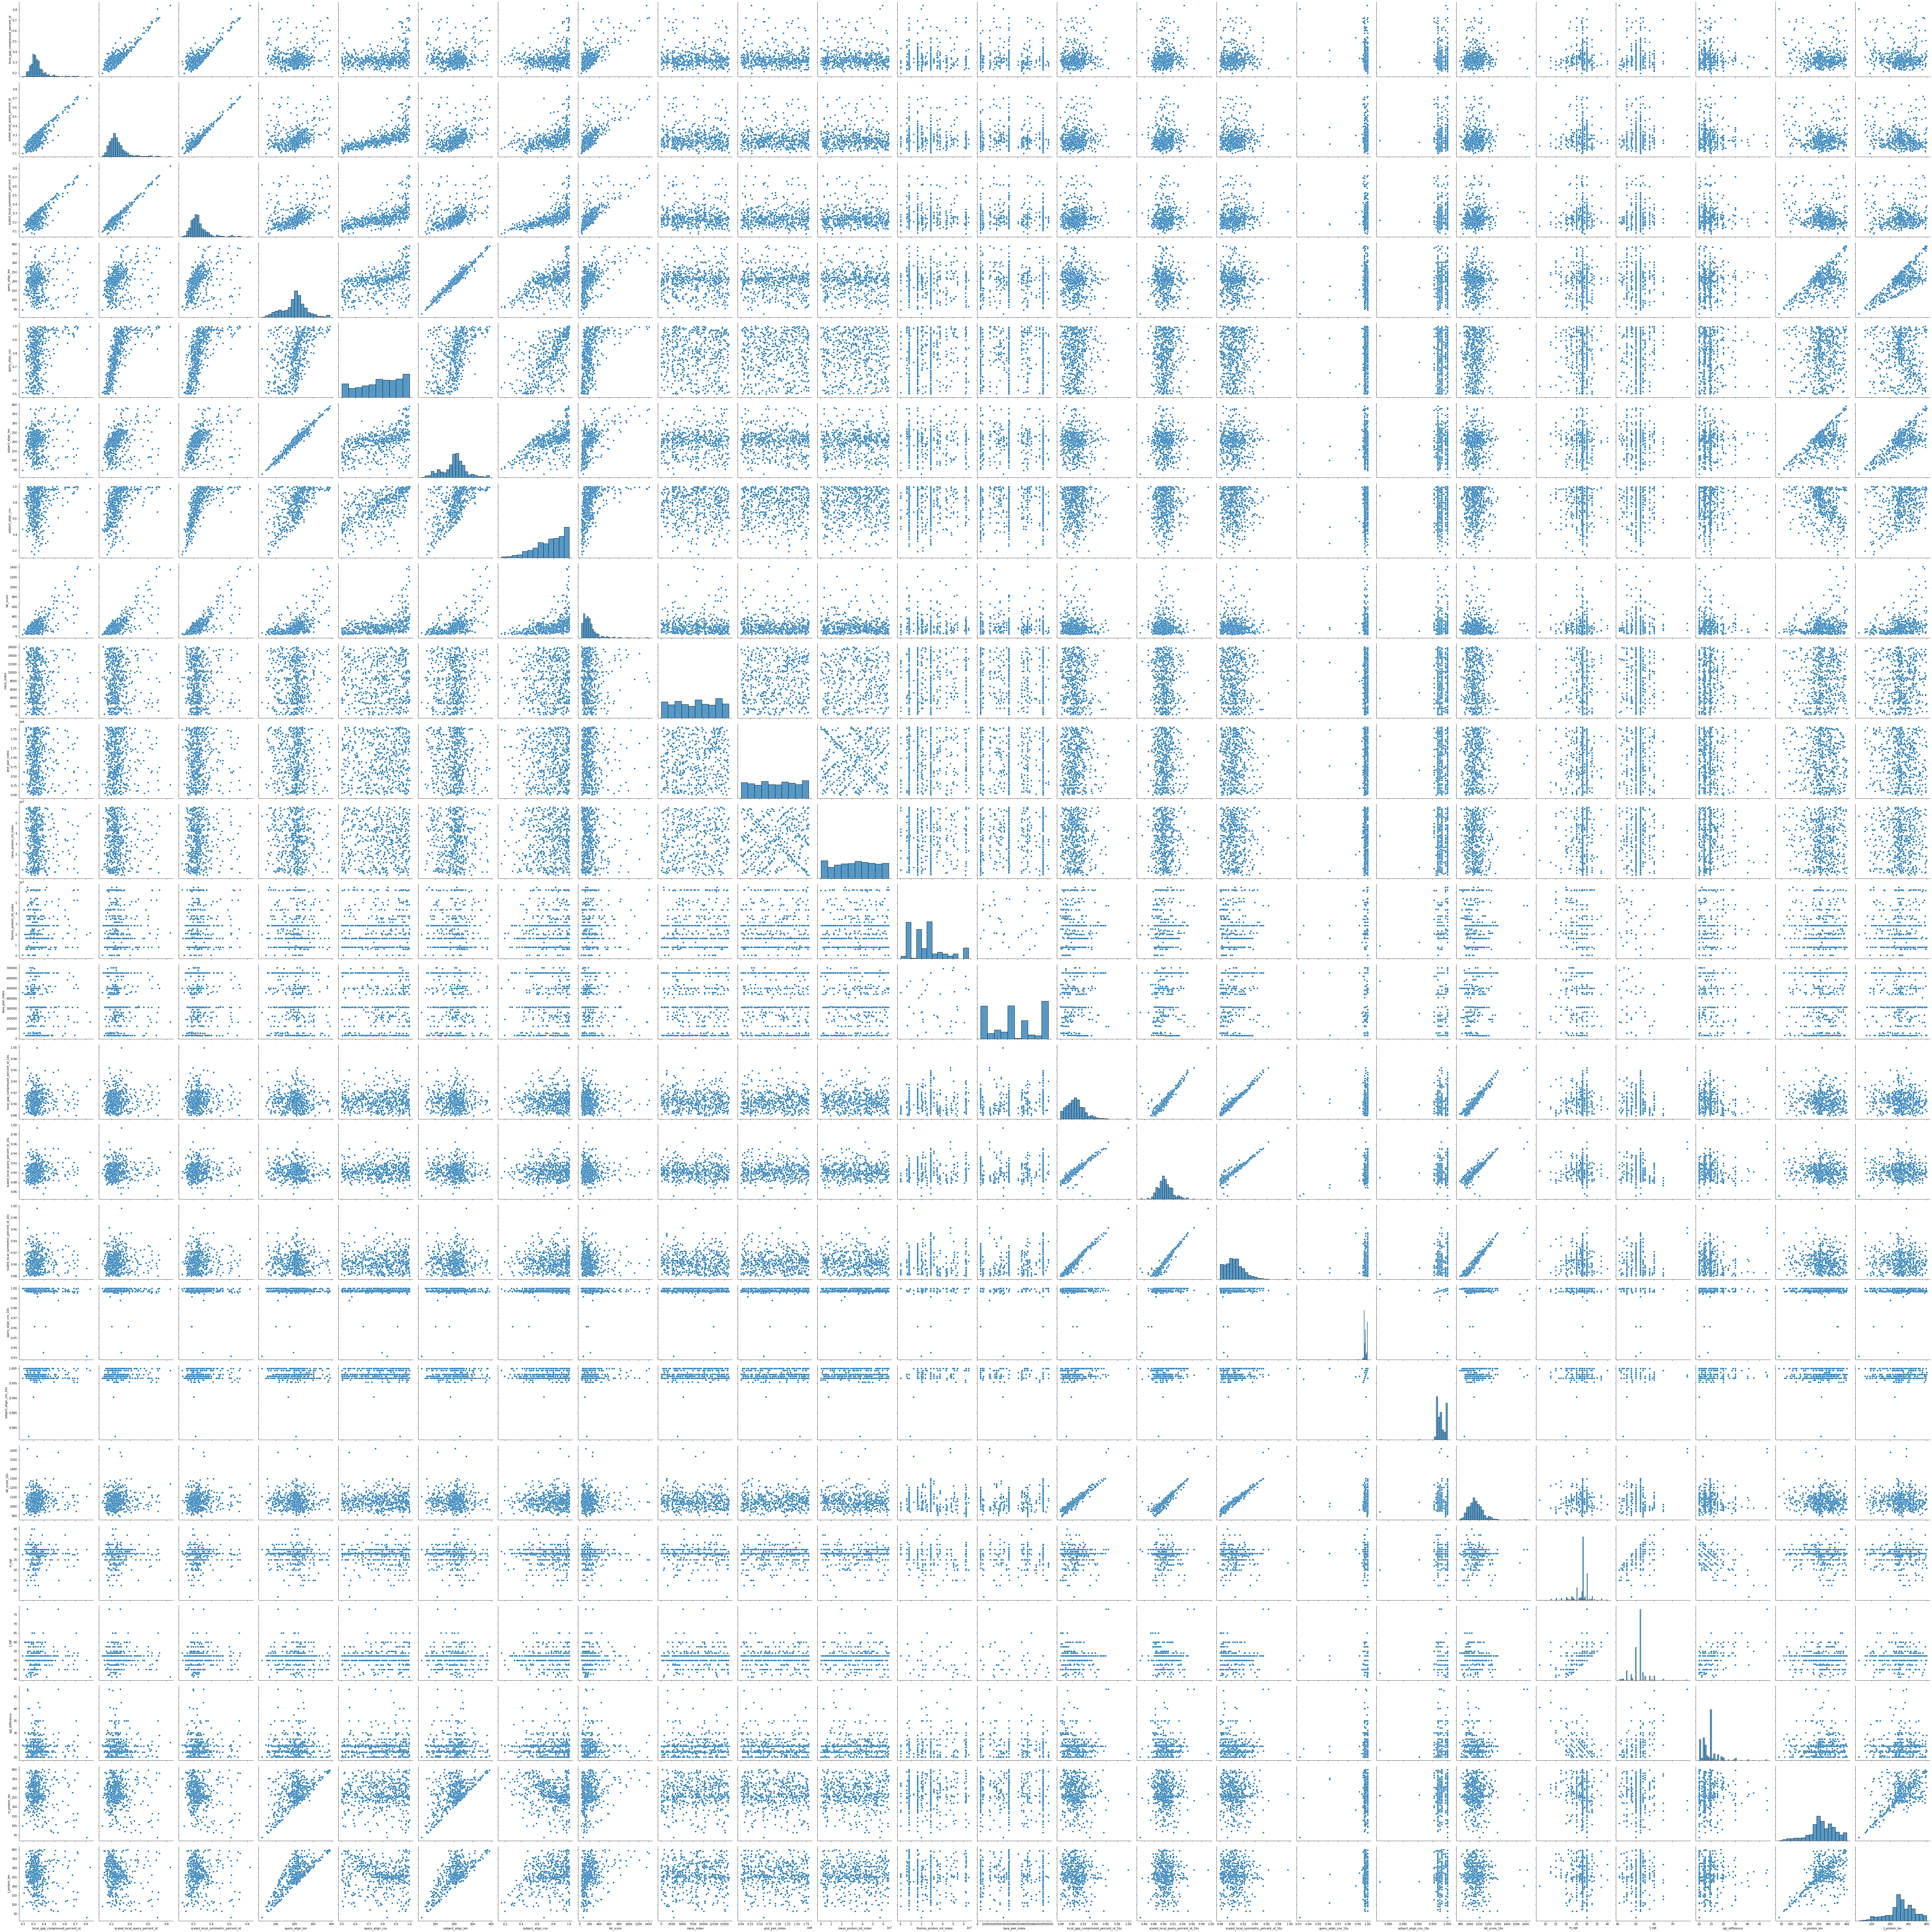

In [9]:
sns.pairplot(df.sample(500),height = 4)

#i dont see much higher-order correlation, so it's likely we can use linear regression

In [9]:
df = df.drop(columns = ['query_align_cov_16s', 'subject_align_cov_16s'])

In [10]:
df.describe()

local_gap_compressed_percent_id  scaled_local_query_percent_id  \
count                     50000.000000                   50000.000000   
mean                          0.349026                       0.276478   
std                           0.096608                       0.114404   
min                           0.164103                       0.081301   
25%                           0.293750                       0.204545   
50%                           0.325000                       0.250000   
75%                           0.367257                       0.308300   
max                           0.985075                       0.985075   

       scaled_local_symmetric_percent_id  query_align_len  query_align_cov  \
count                       50000.000000     50000.000000     50000.000000   
mean                            0.270792       206.011660         0.791507   
std                             0.116039        64.260901         0.144893   
min                             0.045977        19.000000         0.284553   
25%                             0.202020       172.000000         0.673288   
50%                             0.244648       210.000000         0.811321   
75%                             0.301639       240.000000         0.923077   
max                             0.985075       400.000000         1.000000   

       subject_align_len  subject_align_cov    bit_score    meso_index  \
count       50000.000000       50000.000000  50000.00000  50000.000000   
mean          205.414920           0.770875    230.63206   8098.858120   
std            64.430548           0.179955    186.44859   4608.982941   
min            19.000000           0.082019     35.00000      5.000000   
25%           172.000000           0.656854    118.00000   4121.000000   
50%           209.000000           0.806584    186.00000   8046.000000   
75%           240.000000           0.923077    267.00000  12103.000000   
max           399.000000           1.000000   1788.00000  16564.000000   

       prot_pair_index  ...  taxa_pair_index  \
count     5.000000e+04  ...     50000.000000   
mean      9.105934e+07  ...    362827.905140   
std       5.233883e+07  ...    229264.926253   
min       1.219000e+03  ...      4885.000000   
25%       4.645832e+07  ...    173976.750000   
50%       9.160212e+07  ...    312362.000000   
75%       1.360713e+08  ...    617814.000000   
max       1.814866e+08  ...    744518.000000   

       local_gap_compressed_percent_id_16s  scaled_local_query_percent_id_16s  \
count                         50000.000000                       50000.000000   
mean                              0.906828                           0.903266   
std                               0.015240                           0.015626   
min                               0.876590                           0.836055   
25%                               0.895995                           0.893020   
50%                               0.905983                           0.902326   
75%                               0.916172                           0.912576   
max                               0.999351                           0.993544   

       scaled_local_symmetric_percent_id_16s  bit_score_16s         m_ogt  \
count                           50000.000000   50000.000000  50000.000000   
mean                                0.904959    1061.404480     27.348365   
std                                 0.015300      75.659661      3.737201   
min                                 0.880026     891.000000      7.000000   
25%                                 0.893531    1009.000000     27.000000   
50%                                 0.903543    1056.000000     28.000000   
75%                                 0.914698    1108.000000     29.000000   
max                                 0.996439    1679.000000     40.000000   

              t_ogt  ogt_difference  m_protein_len  t_protein_len  
count  50000.000000    50000.000000   50000.000000   5

Text(0, 0.5, 'Count')

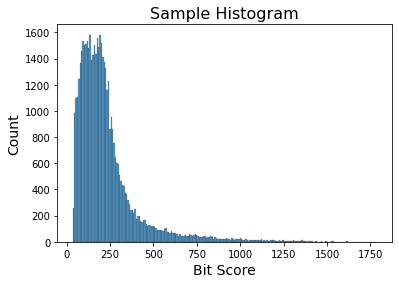

In [11]:
#plot empirical distribution of scaled_local_query_percent_id

target = df['bit_score']
#create histplot
fig, ax = plt.subplots()

sns.histplot(data = df, x = target)

ax.set_title('Sample Histogram', fontsize=16)
ax.set_xlabel('Bit Score', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [12]:
print('The mean is: {} and the standard deviation is: {}.'.format(target.mean(),target.std())) 

print('The minimum bit score is: {} and the maximum bit score is: {}.'.format(target.min(),target.max()))

The mean is: 230.63206 and the standard deviation is: 186.4485895406217.
The minimum bit score is: 35 and the maximum bit score is: 1788.


1) Split dev and test data:

In [13]:
#see if there is a linear correlation between feature and target

pearson_corr = df.corr(method = 'pearson')['bit_score']

pearson_corr.abs() < 0.01

local_gap_compressed_percent_id          False
scaled_local_query_percent_id            False
scaled_local_symmetric_percent_id        False
query_align_len                          False
query_align_cov                          False
subject_align_len                        False
subject_align_cov                        False
bit_score                                False
meso_index                               False
prot_pair_index                          False
meso_protein_int_index                    True
thermo_protein_int_index                 False
taxa_pair_index                           True
local_gap_compressed_percent_id_16s       True
scaled_local_query_percent_id_16s         True
scaled_local_symmetric_percent_id_16s     True
bit_score_16s                             True
m_ogt                                     True
t_ogt                                    False
ogt_difference                           False
m_protein_len                            False
t_protein_len

In [14]:
#lets remove some stuff with low pearson correlation. We're gonna keep meso and thermo ogt for now

df = df.drop(columns = ['meso_index', 'meso_protein_int_index', 'local_gap_compressed_percent_id_16s', 
                        'scaled_local_query_percent_id_16s', 'scaled_local_symmetric_percent_id_16s',
                       'bit_score_16s'])

In [15]:
#choosing 80/20 split instead of 85/15 because of volume of data

dev, test = sklearn.model_selection.train_test_split(df, test_size=0.15, random_state=1)

print(dev.shape)
print(test.shape)

(42500, 16)
(7500, 16)


In [16]:
input_features = [columns for columns in df]
input_features.remove('bit_score')
input_features

['local_gap_compressed_percent_id',
 'scaled_local_query_percent_id',
 'scaled_local_symmetric_percent_id',
 'query_align_len',
 'query_align_cov',
 'subject_align_len',
 'subject_align_cov',
 'prot_pair_index',
 'thermo_protein_int_index',
 'taxa_pair_index',
 'm_ogt',
 't_ogt',
 'ogt_difference',
 'm_protein_len',
 't_protein_len']

In [17]:
target_feature = 'bit_score'

In [18]:
#predicting values 

dev_X = dev[input_features].values
test_X = test[input_features].values

dev_y = dev[target_feature].values.reshape(-1,1)
test_y = test[target_feature].values.reshape(-1,1)  

print(dev_X.shape, test_X.shape, dev_y.shape, test_y.shape)

(42500, 15) (7500, 15) (42500, 1) (7500, 1)


2) Scale the data

In [19]:
scaler = sklearn.preprocessing.StandardScaler()
dev_X = scaler.fit_transform(dev_X)
test_X = scaler.fit_transform(test_X)

3) Regularize the data -L1 or L2? Read online

4. Train the model

In [20]:
model = sklearn.linear_model.Ridge(alpha = 0.1)
type(model.fit(dev_X, dev_y))

sklearn.linear_model._ridge.Ridge

5. Test the model, report MSE and MAE

In [21]:
R2 = model.score(test_X, test_y)
print('R2 score is: {}'.format(R2))

preds = model.predict(test_X)
preds[0:10]

R2 score is: 0.8666724507725843


array([[200.65784387],
       [264.46115589],
       [197.47937756],
       [ 94.61902726],
       [197.14500576],
       [159.84864945],
       [432.06882555],
       [106.04938228],
       [232.66441126],
       [307.81350065]])

y = 0.8581x + 31.5381
R2 = 0.8667


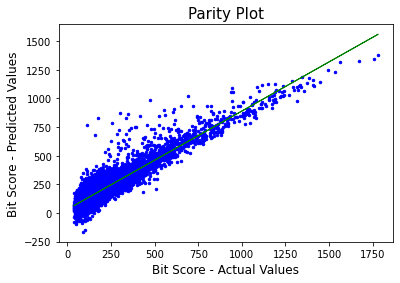

In [22]:
# make a plot to show the fit
fig, ax = plt.subplots()

# plot the actual vs. predicted values
ax.scatter(test_y, preds, c='b',s=6, label='Parity Plot')
plt.xlabel("Bit Score - Actual Values", fontsize=12)
plt.ylabel("Bit Score - Predicted Values", fontsize=12)
plt.title('Parity Plot', fontsize=15)

#plot line of best fit
slope, intercept = np.polyfit(np.ravel(test_y), preds, 1)
plt.plot(np.ravel(test_y), slope*np.ravel(test_y) + intercept, c='green', lw=1)
print('y = {}x + {}'.format(round(float(slope),4), round(float(intercept),4)))
print('R2 = {}'.format(round(R2,4)))

#add mean squared error 

In [23]:
mae = sklearn.metrics.mean_absolute_error(test_y, preds)
mse = sklearn.metrics.mean_squared_error(test_y, preds)

print("The MAE is : {} and the MSE is: {}".format(round(mae,6), round(mse,6)))

The MAE is : 47.675842 and the MSE is: 4648.804479


Make stuff from above into functions.

In [30]:
def split_data(dataframe):
    """
    Takesdataframe and splits it into dev and test sets.
    
    Params
    ----------
    dataframe: Pandas dataframe 

    Returns
    -------
    -Dev and test data
    
    """
    
    #test input data type
    if "pandas.core.frame.DataFrame" not in str(type(dataframe)):
        raise ValueError("Wrong input type!")
    else:
        pass
    
    #split data
    dev, test = sklearn.model_selection.train_test_split(dataframe, test_size=0.15, random_state=1)
    
    return dev, test

In [27]:
class TestDataSplit(unittest.TestCase):
    
    def test_data_split_input(self):
    
        #test that input data type is correct
        
        try:
            split_data([1,2,3])
            self.assertTrue(False)
        except ValueError:
            self.assertTrue(True)
    
    def test_data_split_input(self):
    
        #test that output data type is correct
        
        if "tuple" in str(type(split_data(df))):
            self.assertTrue(True)
        else:
            self.assertTrue(False)

            
#why only running one test?
suite = unittest.TestLoader().loadTestsFromTestCase(TestDataSplit)
_ = unittest.TextTestRunner().run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.011s

OK


In [31]:
def train_reg(dev, test, columns = [],  target = []):
    """
    Takes dev and test dataframes and trains a standard Linear Regression model with selected data.
    
    Params
    ----------
    dev, test: Pandas dataframe previously split
    columns: list of strings, representing input features
    target: list of strings, representing target feature(s)

    Returns
    -------
    -Pearson correlation between each input and the output feature
    -Linear regression model
    -input test data vector (numpy array)
    -feature test vector (numpy array)
    """
    
    #test input arguments
    assert "pandas.core.frame.DataFrame" in str(type(dev))
    assert "pandas.core.frame.DataFrame" in str(type(test))
    assert "str" in str(type(columns[0]))
    assert "str" in str(type(target[0]))
    assert columns[0] in dev
    assert target in test
   
    #split into input and output feature(s)
    dev_X = dev[columns].values
    test_X = test[columns].values

    dev_y = dev[target].values.reshape(-1,1)
    test_y = test[target].values.reshape(-1,1)
    
    #return pearson correlation for linear correlation
    pearson_corr = dev.corr(method = 'pearson')[target]
    
    #scale data
    scaler = sklearn.preprocessing.StandardScaler()
    dev_X = scaler.fit_transform(dev_X)
    test_X = scaler.fit_transform(test_X)
    
    #train model
    model = sklearn.linear_model.LinearRegression()
    model = model.fit(dev_X, dev_y)
    
    return pearson_corr, model, test_X, test_y
    

In [41]:
p_corr, model, test_X, test_y = train_reg(split_data(df)[0], split_data(df)[1], columns = input_features, 
                                          target = target_feature)

For training test, check that train and test data follow similar distribution. (Bootstrap).

In [42]:
#JSD, from L4 notebook

def JSD_dev_and_test(data_sample_1, data_sample_2, axis=None):
    """Jensen-Shannon divergence between two data samples.
    
    Formatted for use with scipy bootstrapping. Creates a vector of values covering
    the data range, the fits scipy historgram PDFs to both data samples. Each PDF is
    evaluated at the vector of values, and those PDF values are used to compute
    JSD. Note that becaue the empirical distribution is a histogram, JSD will rarely
    be less than about ~0.1 due to discretization artifacts.
    
    Parameters
    ----------
    data_sample_1 : numpy array or pandas series
        observations in sample 1
    data_sample_2 : numpy array or pandas series
        observations in sample 2
    axis : ignored
    
    Returns
    -------
    float : Value of JSD
    """
    # get the min and max values to compute PDF
    global_minimum = min([data_sample_1.min(), data_sample_2.min()])
    global_maximum = min([data_sample_1.max(), data_sample_2.max()])
    width = global_maximum - global_minimum
    
    x = np.linspace(global_minimum - 0.1*width, global_maximum + 0.1*width, 1000)
    
    # create empirical PDFs for the samples
    s1_distro = scipy.stats.rv_histogram(np.histogram(data_sample_1))
    s2_distro = scipy.stats.rv_histogram(np.histogram(data_sample_2))
    
    # compute JSD
    JSD = scipy.spatial.distance.jensenshannon(s1_distro.pdf(x), s2_distro.pdf(x))
    return [JSD]

In [43]:
#cite Evan

JSD = (scipy.stats.bootstrap(
    (split_data(df)),
    JSD_dev_and_test,
    n_resamples=1000,
    batch=5,
    method='percentile'
))

In [44]:
#test code-need to update

class TestModelTraining(unittest.TestCase):
    
    def test_invalid_inputs(self):
    
        #test that input data type is correct
        
        try:
            train_reg([1,2,3], [4,5,6], columns = 'string', target = 'string')
            self.assertTrue(False)
        except AssertionError:
            self.assertTrue(True)
    
    def test_input_distro(self):
        
        #test that dev and test data have similar distribution via Jensen Shannon Distribution
        
        JSD = (
            scipy.stats.bootstrap((split_data(df)), 
                                  JSD_dev_and_test, n_resamples=1000, 
                                  batch=5, method='percentile')
        )

        div = JSD.confidence_interval[1]
        
        #asserts that the divergence between data sets is sufficiently low
        assert abs(div) < 0.3, "Warning! High JSD between dev and test set!"
        

suite = unittest.TestLoader().loadTestsFromTestCase(TestModelTraining)
_ = unittest.TextTestRunner().run(suite)

..
----------------------------------------------------------------------
Ran 2 tests in 18.894s

OK


Write an accuracy test. Maybe move the pearson correlation to a unit test to ensure that all variables are valuable to the model.

In [45]:
def test_reg(model, test_X, test_y):
    
    """
    Takes a trained model and test data and tests the model.
    
    Params
    ----------
    model: sklearn.linear_model
    test_X: numpy array
    test_y: numpy array

    Returns
    -------
    -Vector of predictions based on the model (numpy array)
    -prints R2 score of the model
    -prints mean absolute error and mean squared error from model
    """
    
    #test input arguments
    assert "sklearn.linear_model" in str(type(model))
    assert "numpy.ndarray" in str(type(test_X))
    assert "numpy.ndarray" in str(type(test_y))
    
    R2 = model.score(test_X, test_y)
    
    print('R2 score is: {}'.format(R2))

    preds = model.predict(test_X)

    mae = sklearn.metrics.mean_absolute_error(test_y, preds)
    mse = sklearn.metrics.mean_squared_error(test_y, preds)

    print("The MAE is : {} and the MSE is: {}".format(round(mae,6), round(mse,6)))
    
    return preds

In [46]:
preds = test_reg(model, test_X, test_y)
preds

R2 score is: 0.8666737093097041
The MAE is : 47.675742 and the MSE is: 4648.760597


array([[200.66138308],
       [264.45364006],
       [197.48016939],
       ...,
       [180.10970601],
       [311.64081533],
       [179.43208121]])

A good test here can be adding outliers and seeing how much the score and predictions change (probably for the above function).

In [47]:
def plot_regression(model, test_X, test_y):
    """
    Takes a test Linear Regression ML model and plots the predictions against actual values.
    
    Params
    ----------
    model: sklearn.linear_model
    test_X: numpy array
    test_y: numpy array

    Returns
    -------
    -Parity plot of predictions vs. observations
    -Equation of line of best fit (always linear)
    -R2 score
    """
    
    #test input arguments
    assert "sklearn.linear_model" in str(type(model))
    assert "numpy.ndarray" in str(type(test_X))
    assert "numpy.ndarray" in str(type(test_y))
    
    R2 = model.score(test_X, test_y)
    preds = test_reg(model, test_X, test_y)
    
    # make a plot to show the fit
    fig, ax = plt.subplots()

    # plot the actual vs. predicted values
    ax.scatter(test_y, preds, c='b',s=6, label='Parity Plot')
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.title('Parity Plot', fontsize=15)

    #plot line of best fit
    slope, intercept = np.polyfit(np.ravel(test_y), preds, 1)
    plt.plot(np.ravel(test_y), slope*np.ravel(test_y) + intercept, c='green', lw=1)
    print('y = {}x + {}'.format(round(float(slope),4), round(float(intercept),4)))
    print('R2 = {}'.format(round(R2,4)))

R2 score is: 0.8666737093097041
The MAE is : 47.675742 and the MSE is: 4648.760597
y = 0.8581x + 31.5362
R2 = 0.8667


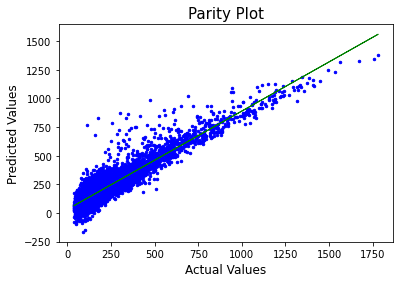

In [48]:
plot_regression(model, test_X, test_y)

THESE ARE OLDER FUNCTIONS. IF ABOVE FUNCTIONS WORK, CLEAN THESE OUT.

def train_reg(dataframe, columns = [],  target = []):
    """
    Takes a dataframe and trains a Linear Ridge (L2 regularization) Regression model with selected data.
    
    Params
    ----------
    dataframe: Pandas dataframe
    columns: list of strings, representing input features
    target: list of strings, representing target feature(s)

    Returns
    -------
    -Pearson correlation between each input and the output feature
    -Linear regression model
    -input test data vector (numpy array)
    -feature test vector (numpy array)
    """
    
    #split data
    dev, test = sklearn.model_selection.train_test_split(dataframe, test_size=0.20, random_state=1)
    
    #split into input and output feature(s)
    dev_X = dev[columns].values
    test_X = test[columns].values

    dev_y = dev[target].values.reshape(-1,1)
    test_y = test[target].values.reshape(-1,1)
    
    #return pearson correlation for linear correlation
    pearson_corr = dev.corr(method = 'pearson')[target]
    
    #scale data
    scaler = sklearn.preprocessing.StandardScaler()
    dev_X = scaler.fit_transform(dev_X)
    test_X = scaler.fit_transform(test_X)
    
    #train model
    model = sklearn.linear_model.Ridge()
    model = model.fit(dev_X, dev_y)
    
    return pearson_corr, model, test_X, test_y
    

p_corr, model, test_X, test_y = train_reg(df, columns = ['meso_ogt', 'thermo_ogt', 
                                                         'scaled_local_symmetric_percent_id',
                                                         'local_E_value','local_gap_compressed_percent_id'], 
                                          target = ['scaled_local_query_percent_id'])

#test code

def test_reg(model, test_X, test_y):
    
    """
    Takes a trained model and test data and tests the model.
    
    Params
    ----------
    model: sklearn.linear_model
    test_X: numpy array
    test_y: numpy array

    Returns
    -------
    -Vector of predictions based on the model (numpy array)
    -prints R2 score of the model
    -prints mean absolute error and mean squared error from model
    """
    
    R2 = model.score(test_X, test_y)
    
    print('R2 score is: {}'.format(R2))

    preds = model.predict(test_X)

    mae = sklearn.metrics.mean_absolute_error(test_y, preds)
    mse = sklearn.metrics.mean_squared_error(test_y, preds)

    print("The MAE is : {} and the MSE is: {}".format(round(mae,6), round(mse,6)))
    
    return preds

preds = test_reg(model, test_X, test_y)
preds

def plot_regression(model, test_X, test_y):
    """
    Takes a test Linear Regression ML model and plots the predictions against actual values.
    
    Params
    ----------
    model: sklearn.linear_model
    test_X: numpy array
    test_y: numpy array

    Returns
    -------
    -Parity plot of predictions vs. observations
    -Equation of line of best fit (always linear)
    -R2 score
    """
    preds = test_reg(model, test_X, test_y)
    
    # make a plot to show the fit
    fig, ax = plt.subplots()

    # plot the actual vs. predicted values
    ax.scatter(test_y, preds, c='b',s=6, label='Parity Plot')
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.title('Parity Plot', fontsize=15)

    #plot line of best fit
    slope, intercept = np.polyfit(np.ravel(test_y), preds, 1)
    plt.plot(np.ravel(test_y), slope*np.ravel(test_y) + intercept, c='green', lw=1)
    print('y = {}x + {}'.format(round(float(slope),4), round(float(intercept),4)))
    print('R2 = {}'.format(round(R2,4)))